In [2]:
def lollipop_dataset_0(bs, seed=0):
    np.random.seed(seed)
    cs = int(0.94 * bs)
    cp = int(0.99 * bs)
    r = np.random.uniform(size=cs)
    fi = np.random.uniform(0, 2 * np.pi, size=cs)
    x = np.zeros((bs, 2))
    x[:cs, 0] = r ** 0.5 * np.sin(fi)
    x[:cs, 1] = r ** 0.5 * np.cos(fi)
    x += 2
    stick = np.random.uniform(high=2 - 1 / np.sqrt(2), size=(cp - cs))
    x[cs:cp, 0] = stick
    x[cs:cp, 1] = stick
    x[cp:] = np.random.normal(loc=(-.5, -.5), scale=1e-3, size=(bs-cp, 2))
    x = np.concatenate([x, np.zeros((x.shape[0],1))], axis=1)
    return x

def sin_freq(bs, freq=5, seed=0):
    np.random.seed(seed)
    x = np.random.uniform(0, 1, bs)
    return np.stack([x, np.sin(freq*x*(2 * np.pi))], axis=1)

def sin_dens(bs, freq=5, offset=2.1, seed=0):
    def fun(x, y, freq, offset):
        return np.cos(freq * x) + np.cos(freq * y) + offset
    np.random.seed(seed)
    sample = np.random.rand(10*bs, 3) * np.array([[2*np.pi, 2*np.pi, offset + 2]]) + np.array([[-np.pi, -np.pi, 0]])
    resampled = np.array([[point[0], point[1]]
                          for point in sample
                          if point[2] < fun(point[0], point[1], freq, offset)
                         ])
    assert len(resampled) >= bs
    resampled = resampled[:bs]
    resampled = np.concatenate([resampled, np.zeros_like(resampled)], axis=1)
    return resampled

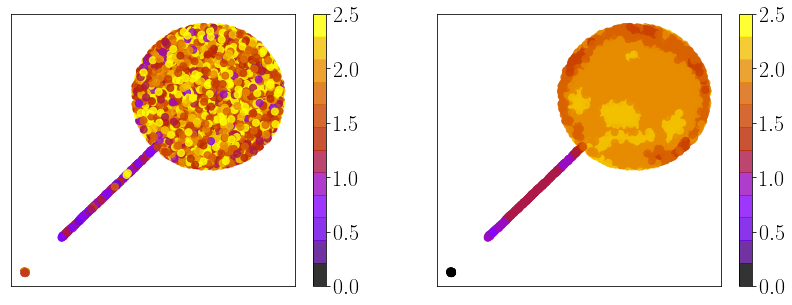

In [29]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob

def lollipop_dataset(bs, seed=0):
    np.random.seed(seed)
    cs = int(0.95 * bs)
    r = np.random.uniform(size=cs)
    fi = np.random.uniform(0, 2 * np.pi, size=cs)
    x = np.zeros((bs, 2))
    x[:cs, 0] = r ** 0.5 * np.sin(fi)
    x[:cs, 1] = r ** 0.5 * np.cos(fi)
    x += 2
    stick = np.random.uniform(high=2 - 1 / np.sqrt(2), size=(bs - cs))
    x[cs:, 0] = stick
    x[cs:, 1] = stick
    return x

def normalize(data):
    data -= data.mean(axis=0)
    data /= data.std() + 0.001
    return data


f_mle = "LIDL_REPORT_DIR/report_dim_estimate_algorithm:mle_dataset:lollipop-0_covariance:diag_k:10_delta:0.1_deltas:None_device:cuda_layers:4_size:10000_seed:0_hidden:5_lr:0.0001_epochs:10000.csv"
f_lidl = "LIDL_REPORT_DIR/report_dim_estimate_algorithm:rqnsf_dataset:lollipop-0_covariance:diag_k:3_delta:0.1_device:cuda_layers:4.csv"
plt.figure(figsize=(14,5))
ax = plt.subplot(1,2,1)
df = pd.read_csv(f_mle)
x = lollipop_dataset_0(df.shape[0])
x = normalize(x)
x = x + np.random.normal(loc=0, scale=0.01, size=x.shape)
c = df.iloc[:,0].values
n = 12
skip = 1
cmap = plt.get_cmap('gnuplot', n)
cs = c[::skip]
ax = ax.scatter(x[::skip,0], x[::skip,1], s=50, alpha=0.8, c=cs, cmap=cmap, vmin=0.0, vmax=2.5)
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(ax, ticks=np.linspace(0., 2.5, 6))
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(ticks_size)
# plt.title("MLE (SOTA)")
ax = plt.subplot(1,2,2)
df = pd.read_csv(f_lidl)
c = df.iloc[:,0].values
cs = c[::skip]
ax = ax.scatter(x[::skip,0], x[::skip,1], s=50, alpha=0.8, c=cs, cmap=cmap, vmin=0.0, vmax=2.5)
# plt.title("LIDL (ours)")
cbar = plt.colorbar(ax, ticks=np.linspace(0., 2.5, 6))
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(ticks_size)

plt.xticks([])
plt.yticks([])
plt.show()


/home/HOME_DIR/PycharmProjects/lidl/experiments/sinus-freq/report_dim_estimate_algorithm:rqnsf_dataset:sin-50_covariance:diag_k:3_delta:0.1_deltas:None_device:cuda_layers:4_size:10000_seed:0_hidden:15_lr:0.0001_epochs:10000.csv


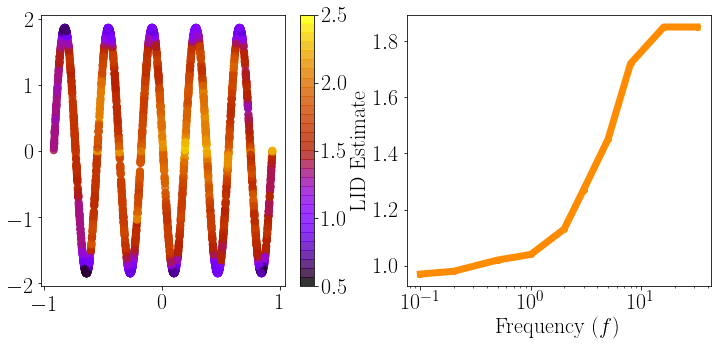

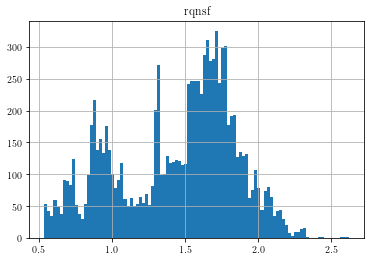

In [27]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob

def lollipop_dataset(bs, seed=0):
    np.random.seed(seed)
    cs = int(0.95 * bs)
    r = np.random.uniform(size=cs)
    fi = np.random.uniform(0, 2 * np.pi, size=cs)
    x = np.zeros((bs, 2))
    x[:cs, 0] = r ** 0.5 * np.sin(fi)
    x[:cs, 1] = r ** 0.5 * np.cos(fi)
    x += 2
    stick = np.random.uniform(high=2 - 1 / np.sqrt(2), size=(bs - cs))
    x[cs:, 0] = stick
    x[cs:, 1] = stick
    return x

def normalize(data):
    data -= data.mean(axis=0)
    data /= data.std() + 0.001
    return data

dim_plot = np.array([
    [0.1,0.97],
    [0.2,0.98],
[0.5,1.02],
[1.0,1.04],
[2.0,1.13],
[3.0,1.27],
[5.0,1.45],
[8.0,1.72],
[16.0,1.85],
[32,1.85]])


f = "LIDL_REPORT_DIR/report_dim_estimate_maf_lollipop-0_0.05_3.csv"
files = [
    "LIDL_REPORT_DIR/report_dim_estimate_algorithm:rqnsf_dataset:sin-50_covariance:diag_k:3_delta:0.1_deltas:None_device:cuda_layers:4_size:10000_seed:0_hidden:15_lr:0.0001_epochs:10000.csv",
]

matplotlib.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
label_size = 22
ticks_size = 22
legend_size = 20

for f in files:
    try:
        plt.figure(figsize=(12,5))
        ax = plt.subplot(1,2,1)
        ax.tick_params(labelsize=ticks_size)
        df = pd.read_csv(f)
        x = sin_freq(df.shape[0], freq=5.0)
        x = normalize(x)
        x = x + np.random.normal(loc=0, scale=0.0001, size=x.shape)
        c = df.iloc[:,0].values
        n = 30
        skip = 3
        cmap = plt.get_cmap('gnuplot', n)
        cs = c[::skip]
        ax = ax.scatter(x[::skip,0], x[::skip,1], s=50, alpha=0.8, c=cs, cmap=cmap, vmin=0.5, vmax=2.5)
        cbar = plt.colorbar(ax, ticks=np.linspace(0.5, 2.5, 5))
        for t in cbar.ax.get_yticklabels():
             t.set_fontsize(ticks_size)
        ax = plt.subplot(1,2,2)
        ax.tick_params(labelsize=ticks_size)
        plt.plot(dim_plot[:,0], dim_plot[:,1], 'o-', c='darkorange', linewidth=7)
        plt.xlabel("$f$")
        plt.ylabel("Estimated ID")
        plt.xscale('log')
        df.hist(bins=100)
        ax.set_xlabel("Frequency ($f$)", size=label_size)
        ax.set_ylabel("LID Estimate", size=label_size);
    except:
        print("Error!")

In [398]:
dim_plot = np.array([
    [1, 1.95],
    [2, 1.92],
    [3, 1.99],
    [4, 1.95],
    [6, 1.96],
    [8, 1.89],
    [10, 1.98],
    [12, 1.96],
    [14, 1.94],
    [16, 1.98],
])

/home/HOME_DIR/PycharmProjects/lidl/experiments/sinus-dens/report_dim_estimate_algorithm:rqnsf_dataset:sin-dens-3_covariance:diag_k:3_delta:0.1_deltas:None_device:cuda_layers:4_size:10000_seed:0_hidden:15_lr:0.0001_epochs:10000.csv


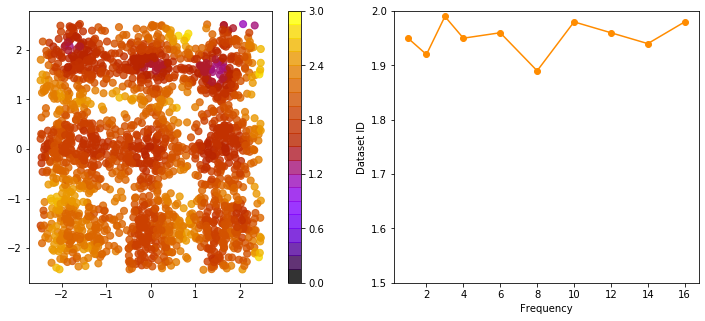

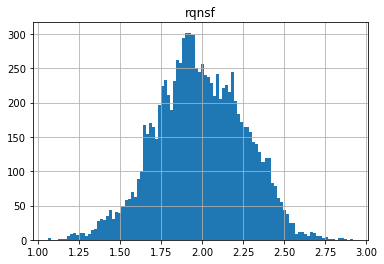

In [419]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob

def lollipop_dataset(bs, seed=0):
    np.random.seed(seed)
    cs = int(0.95 * bs)
    r = np.random.uniform(size=cs)
    fi = np.random.uniform(0, 2 * np.pi, size=cs)
    x = np.zeros((bs, 2))
    x[:cs, 0] = r ** 0.5 * np.sin(fi)
    x[:cs, 1] = r ** 0.5 * np.cos(fi)
    x += 2
    stick = np.random.uniform(high=2 - 1 / np.sqrt(2), size=(bs - cs))
    x[cs:, 0] = stick
    x[cs:, 1] = stick
    return x

def normalize(data):
    data -= data.mean(axis=0)
    data /= data.std() + 0.001
    return data

fr = 3

files = [
    f"LIDL_REPORT_DIR/report_dim_estimate_algorithm:rqnsf_dataset:sin-dens-{fr}_covariance:diag_k:3_delta:0.1_deltas:None_device:cuda_layers:4_size:10000_seed:0_hidden:15_lr:0.0001_epochs:10000.csv"
]
for f in files:
    print(f)
#     try:
    plt.figure(figsize=(12,5))
    ax = plt.subplot(1,2,1)
    df = pd.read_csv(f)
    # x = lollipop_dataset(df.shape[0])
#         x = lollipop_dataset_0(df.shape[0])
#         x = sin_freq(df.shape[0], freq=5.0)
    x = sin_dens(df.shape[0], freq=fr)
    x = normalize(x)
    x = x + np.random.normal(loc=0, scale=0.0001, size=x.shape)
    c = df.iloc[:,0].values
    n = 20
    skip = 5
    cmap = plt.get_cmap('gnuplot', n)
    cs = c[::skip]
    ax = ax.scatter(x[::skip,0], x[::skip,1], s=50, alpha=0.8, c=cs, cmap=cmap, vmin=0., vmax=3)
#         plt.colorbar()
    plt.colorbar(ax, ticks=np.linspace(0., 3, 6))
    ax = plt.subplot(1,2,2)
    plt.plot(dim_plot[:,0], dim_plot[:,1], 'o-', c='darkorange')
    plt.ylim(1.5,2)
    plt.xlabel("Frequency")
    plt.ylabel("Dataset ID")
    df.hist(bins=100)
    plt.show()
#     except:
#         print("Error!")